In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install sklearn

In [3]:
df=pd.read_csv('/Users/selva/Documents/ML Project/input_price_data_5.csv',sep=';',names=['date','price_euro'],skiprows=[0])
df['date'] = pd.to_datetime(df['date'])
df['price_euro'] = df['price_euro'].str.replace(',', '.')
df['price_euro'] = df['price_euro'].astype(float)
df.set_index('date', inplace=True)
df.index.freq='MS'
df


/var/folders/ql/5c8r7ybd50sfxsy3p12bhm180000gn/T/ipykernel_1766/2555966056.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,price_euro
date,
2018-09-01,33.19
2018-10-01,33.83
2018-11-01,35.43
2018-12-01,36.63
2019-01-01,37.16
2019-02-01,36.47
2019-03-01,35.47
2019-04-01,35.22
2019-05-01,34.98


In [4]:
!pip install statsmodels

### To view the seasonality in data import seasonal_decompose

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

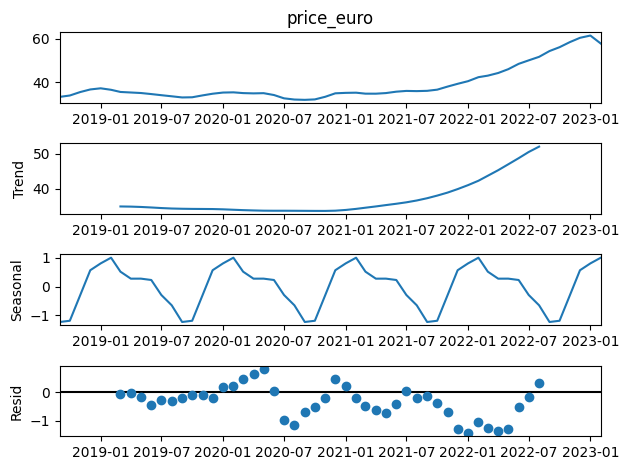

In [16]:
results=seasonal_decompose(df['price_euro'])
results.plot();

In [17]:
len(df)

54

In [30]:
train=df.iloc[:35]
test=df.iloc[35:]
print(train.shape,test.shape)

(35, 1) (19, 1)


### To convert the data into scale of o to 1. 

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [32]:
df.head(),df.tail()

(            price_euro
 date                  
 2018-09-01       33.19
 2018-10-01       33.83
 2018-11-01       35.43
 2018-12-01       36.63
 2019-01-01       37.16,
             price_euro
 date                  
 2022-10-01       56.19
 2022-11-01       58.56
 2022-12-01       60.53
 2023-01-01       61.58
 2023-02-01       57.88)

In [33]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)


In [34]:
scaled_train

array([[0.25655431],
       [0.37640449],
       [0.67602996],
       [0.90074906],
       [1.        ],
       [0.87078652],
       [0.6835206 ],
       [0.63670412],
       [0.5917603 ],
       [0.5       ],
       [0.40262172],
       [0.3071161 ],
       [0.20786517],
       [0.22284644],
       [0.38576779],
       [0.52996255],
       [0.63108614],
       [0.64981273],
       [0.58426966],
       [0.55992509],
       [0.57865169],
       [0.417603  ],
       [0.13108614],
       [0.02621723],
       [0.        ],
       [0.03745318],
       [0.2659176 ],
       [0.56554307],
       [0.60486891],
       [0.61985019],
       [0.53558052],
       [0.53370787],
       [0.58614232],
       [0.70786517],
       [0.77340824]])

In [35]:
scaled_test

array([[0.75655431],
       [0.78089888],
       [0.88202247],
       [1.14981273],
       [1.38951311],
       [1.61797753],
       [1.96441948],
       [2.09737828],
       [2.32771536],
       [2.65730337],
       [3.11985019],
       [3.42322097],
       [3.72846442],
       [4.22846442],
       [4.56367041],
       [5.00749064],
       [5.37640449],
       [5.57303371],
       [4.88014981]])

In [38]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [39]:
n_input=5
n_features=1
generator=TimeseriesGenerator(scaled_train, scaled_train, length=n_input,batch_size=1)

In [40]:
print(len(train),len(generator))

35 30


In [42]:
X,y=generator[1]

print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the array: 
[0.37640449 0.67602996 0.90074906 1.         0.87078652]
Predict this y: 
[[0.6835206]]


In [43]:
X.shape

(1, 5, 1)

In [250]:
#n_input=12
#n_features=1
#generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(100,activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

2023-04-27 15:20:33.342155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [253]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               40800     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(generator, epochs=50)

Epoch 1/50
30/30 [==============================] - 1s 2ms/step - loss: 0.1742
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 5/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0405
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 7/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0317
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 12/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 13/50
30/30 [==============================

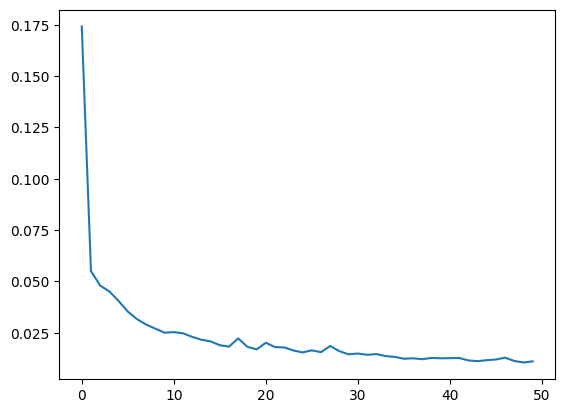

In [47]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [48]:
last_train_batch=scaled_train[-5:]
last_train_batch

array([[0.53558052],
       [0.53370787],
       [0.58614232],
       [0.70786517],
       [0.77340824]])

In [49]:
last_train_batch=last_train_batch.reshape((1, n_input,n_features))
last_train_batch

array([[[0.53558052],
        [0.53370787],
        [0.58614232],
        [0.70786517],
        [0.77340824]]])

In [50]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 113ms/step


array([[0.6819878]], dtype=float32)

In [51]:
scaled_test[0]

array([0.75655431])

In [52]:
test_predictions=[]
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 13ms/step


In [53]:
test_predictions

[array([0.6819878], dtype=float32),
 array([0.669409], dtype=float32),
 array([0.64281416], dtype=float32),
 array([0.60044914], dtype=float32),
 array([0.5632839], dtype=float32),
 array([0.5325464], dtype=float32),
 array([0.50231165], dtype=float32),
 array([0.47962132], dtype=float32),
 array([0.47156757], dtype=float32),
 array([0.4802317], dtype=float32),
 array([0.5042654], dtype=float32),
 array([0.538692], dtype=float32),
 array([0.56519693], dtype=float32),
 array([0.580851], dtype=float32),
 array([0.5855571], dtype=float32),
 array([0.5828464], dtype=float32),
 array([0.5718669], dtype=float32),
 array([0.5557256], dtype=float32),
 array([0.5384982], dtype=float32)]

In [54]:
test.head()

,price_euro
date,
2021-08-01,35.86
2021-09-01,35.99
2021-10-01,36.53
2021-11-01,37.96
2021-12-01,39.24


In [55]:
true_predictions=scaler.inverse_transform(test_predictions)

In [59]:
test['Predictions']=true_predictions
test['Predictions']

/var/folders/ql/5c8r7ybd50sfxsy3p12bhm180000gn/T/ipykernel_1766/3790369941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


date
2021-08-01    35.461815
2021-09-01    35.394644
2021-10-01    35.252628
2021-11-01    35.026398
2021-12-01    34.827936
2022-01-01    34.663798
2022-02-01    34.502344
2022-03-01    34.381178
2022-04-01    34.338171
2022-05-01    34.384437
2022-06-01    34.512777
2022-07-01    34.696615
2022-08-01    34.838152
2022-09-01    34.921744
2022-10-01    34.946875
2022-11-01    34.932400
2022-12-01    34.873769
2023-01-01    34.787575
2023-02-01    34.695581
Freq: MS, Name: Predictions, dtype: float64

<Axes: xlabel='date'>

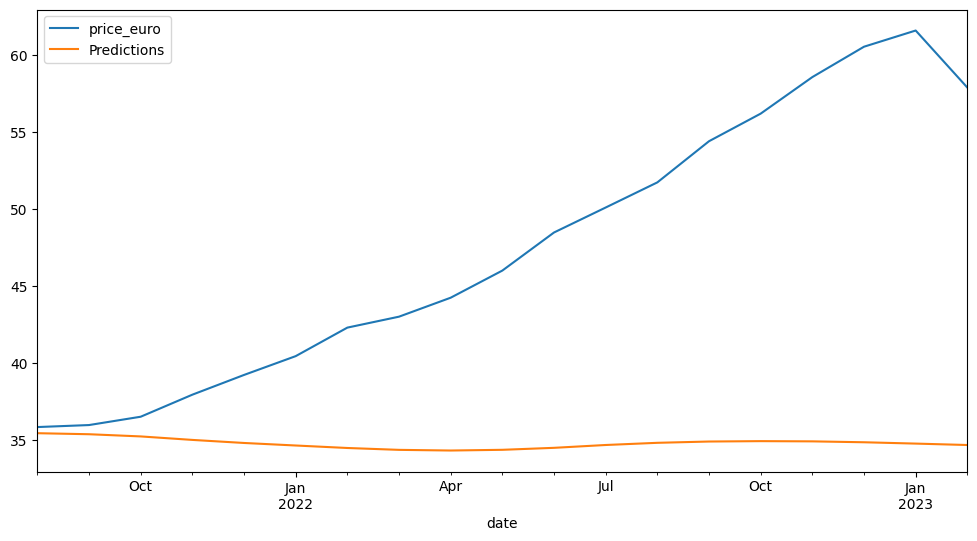

In [60]:
test.plot(figsize=(12,6))

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['price_euro'],test['Predictions']))
print(rmse)

15.309116152599351
